<a href="https://colab.research.google.com/github/kavyas1989/Bangalore-Rainfall-prediction/blob/main/Bangalore_rainfall_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Aim : Predicting whether a customer will default on his/her credit card**

**This project is weather forecast model about predicting whether it will be rain in a day or not. **

In [341]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# import warning 
import warnings
warnings.filterwarnings('ignore')
 
#import datetime library t wrok with datetime values
from datetime import datetime
import datetime as dt


## Data Overview and Decription

In [342]:
# load the dataset

data = pd.read_csv('/content/bangalore_climate_data.csv')

In [343]:
# intial data overview
data.head()

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),pressure_msl (hPa),surface_pressure (hPa),rain (mm),snowfall (cm),cloudcover_low (%),cloudcover_mid (%),shortwave_radiation (W/m²),direct_radiation (W/m²),windspeed_100m (km/h),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_moisture_0_to_7cm (m³/m³)
0,2020-01-01T00:00,18.8,94,17.8,1016.1,921.4,0.0,0,94,4,0,0,22.9,0.14,20.9,0.314
1,2020-01-01T01:00,18.8,94,17.7,1015.7,920.8,0.0,0,99,8,0,0,21.7,0.14,20.8,0.314
2,2020-01-01T02:00,18.6,95,17.7,1015.2,920.3,0.0,0,99,9,0,0,20.3,0.12,20.7,0.314
3,2020-01-01T03:00,18.4,95,17.6,1014.9,920.0,0.0,0,96,17,0,0,21.1,0.11,20.6,0.314
4,2020-01-01T04:00,18.2,95,17.4,1015.2,920.2,0.0,0,98,13,0,0,20.3,0.10,20.5,0.314


In [344]:
# dataset columns
data.columns

Index(['time', 'temperature_2m (°C)', 'relativehumidity_2m (%)',
       'dewpoint_2m (°C)', 'pressure_msl (hPa)', 'surface_pressure (hPa)',
       'rain (mm)', 'snowfall (cm)', 'cloudcover_low (%)',
       'cloudcover_mid (%)', 'shortwave_radiation (W/m²)',
       'direct_radiation (W/m²)', 'windspeed_100m (km/h)',
       'vapor_pressure_deficit (kPa)', 'soil_temperature_0_to_7cm (°C)',
       'soil_moisture_0_to_7cm (m³/m³)'],
      dtype='object')

In [345]:
# making copy of our dataset on which i am going to work 
wdata = data.copy()

In [346]:
# renaming our columns name for more understanding
wdata.rename(columns = {'temperature_2m (°C)':'temperature', 'relativehumidity_2m (%)':'relative humidity',
                              'dewpoint_2m (°C)':'dewpoint' , 'pressure_msl (hPa)' : 'pressure',
                       'surface_pressure (hPa)'  : 'surface pressure' , 'rain (mm)' : 'rain', 'snowfall (cm)' : 'snowfall',
                        'cloudcover_low (%)' : 'cloudcover low', 'cloudcover_mid (%)' :'cloudcover mid',
                        'shortwave_radiation (W/m²)' : 'shortwave radiation',
                        'direct_radiation (W/m²)' : 'direct radiation', 'diffuse_radiation (W/m²)' : 'diffuse radiation',
                        'windspeed_100m (km/h)' : 'windspeed', 
                        'vapor_pressure_deficit (kPa)' : 'vapor pressure deficit' ,
                        'soil_temperature_0_to_7cm (°C)' : 'soil temperature',
                        'soil_moisture_0_to_7cm (m³/m³)' : 'soil moisture'}
             , inplace = True)

In [347]:
wdata.head()

,time,temperature,relative humidity,dewpoint,pressure,surface pressure,rain,snowfall,cloudcover low,cloudcover mid,shortwave radiation,direct radiation,windspeed,vapor pressure deficit,soil temperature,soil moisture
0,2020-01-01T00:00,18.8,94,17.8,1016.1,921.4,0.0,0,94,4,0,0,22.9,0.14,20.9,0.314
1,2020-01-01T01:00,18.8,94,17.7,1015.7,920.8,0.0,0,99,8,0,0,21.7,0.14,20.8,0.314
2,2020-01-01T02:00,18.6,95,17.7,1015.2,920.3,0.0,0,99,9,0,0,20.3,0.12,20.7,0.314
3,2020-01-01T03:00,18.4,95,17.6,1014.9,920.0,0.0,0,96,17,0,0,21.1,0.11,20.6,0.314
4,2020-01-01T04:00,18.2,95,17.4,1015.2,920.2,0.0,0,98,13,0,0,20.3,0.10,20.5,0.314


In [348]:
wdata.columns


Index(['time', 'temperature', 'relative humidity', 'dewpoint', 'pressure',
       'surface pressure', 'rain', 'snowfall', 'cloudcover low',
       'cloudcover mid', 'shortwave radiation', 'direct radiation',
       'windspeed', 'vapor pressure deficit', 'soil temperature',
       'soil moisture'],
      dtype='object')

In [349]:
# checking basic info of our dataset

wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    26304 non-null  object 
 1   temperature             26304 non-null  float64
 2   relative humidity       26304 non-null  int64  
 3   dewpoint                26304 non-null  float64
 4   pressure                26304 non-null  float64
 5   surface pressure        26304 non-null  float64
 6   rain                    26304 non-null  float64
 7   snowfall                26304 non-null  int64  
 8   cloudcover low          26304 non-null  int64  
 9   cloudcover mid          26304 non-null  int64  
 10  shortwave radiation     26304 non-null  int64  
 11  direct radiation        26304 non-null  int64  
 12  windspeed               26304 non-null  float64
 13  vapor pressure deficit  26304 non-null  float64
 14  soil temperature        26304 non-null

## **Data Preprocessing**   

first we need to convert time varibale from object datastype to datetime type to work with it

In [350]:
wdata['time'] = pd.to_datetime(wdata['time'])


now extracting date from our time feature column

In [351]:
wdata['Date'] = wdata['time'].dt.date

In [352]:
wdata.set_index('Date',inplace = True)

In [353]:
wdata.head()

,time,temperature,relative humidity,dewpoint,pressure,surface pressure,rain,snowfall,cloudcover low,cloudcover mid,shortwave radiation,direct radiation,windspeed,vapor pressure deficit,soil temperature,soil moisture
Date,,,,,,,,,,,,,,,,
2020-01-01,2020-01-01 00:00:00,18.8,94,17.8,1016.1,921.4,0.0,0,94,4,0,0,22.9,0.14,20.9,0.314
2020-01-01,2020-01-01 01:00:00,18.8,94,17.7,1015.7,920.8,0.0,0,99,8,0,0,21.7,0.14,20.8,0.314
2020-01-01,2020-01-01 02:00:00,18.6,95,17.7,1015.2,920.3,0.0,0,99,9,0,0,20.3,0.12,20.7,0.314
2020-01-01,2020-01-01 03:00:00,18.4,95,17.6,1014.9,920.0,0.0,0,96,17,0,0,21.1,0.11,20.6,0.314
2020-01-01,2020-01-01 04:00:00,18.2,95,17.4,1015.2,920.2,0.0,0,98,13,0,0,20.3,0.10,20.5,0.314


In [354]:
# now we have extracted date from time feature, so we can drop it.
# in a city like bengaluru it's like unexplainable natural pheonemena if snowfall happens , so we can drop snowfal also

wdata.drop('time', axis = 1 , inplace = True)
wdata.drop('snowfall' , axis = 1 , inplace = True)

In [355]:
wdata.head()

,temperature,relative humidity,dewpoint,pressure,surface pressure,rain,cloudcover low,cloudcover mid,shortwave radiation,direct radiation,windspeed,vapor pressure deficit,soil temperature,soil moisture
Date,,,,,,,,,,,,,,
2020-01-01,18.8,94,17.8,1016.1,921.4,0.0,94,4,0,0,22.9,0.14,20.9,0.314
2020-01-01,18.8,94,17.7,1015.7,920.8,0.0,99,8,0,0,21.7,0.14,20.8,0.314
2020-01-01,18.6,95,17.7,1015.2,920.3,0.0,99,9,0,0,20.3,0.12,20.7,0.314
2020-01-01,18.4,95,17.6,1014.9,920.0,0.0,96,17,0,0,21.1,0.11,20.6,0.314
2020-01-01,18.2,95,17.4,1015.2,920.2,0.0,98,13,0,0,20.3,0.10,20.5,0.314


In [356]:
# now we want to make prediction whether it will rain in a day or not so, grouping on thebase of date

# doing appropriate aggegate operation on my feature column as follows

grouped_wdata = wdata.groupby('Date').agg({'temperature': 'mean','relative humidity': 'mean' , 'dewpoint': 'mean' ,
                           'pressure': 'mean', 'surface pressure': 'mean' , 'rain': 'sum' , 'cloudcover low': 'mean' ,
                           'cloudcover mid': 'mean' , 'shortwave radiation': 'sum', 'direct radiation': 'sum' ,
                           'windspeed' : 'mean' , 'vapor pressure deficit' : 'mean' , 'soil temperature' : 'mean',
                           'soil moisture' : 'mean'
                            })

In [357]:
grouped_wdata.head()

,temperature,relative humidity,dewpoint,pressure,surface pressure,rain,cloudcover low,cloudcover mid,shortwave radiation,direct radiation,windspeed,vapor pressure deficit,soil temperature,soil moisture
Date,,,,,,,,,,,,,,
2020-01-01,21.245833,80.833333,17.545833,1015.958333,921.795833,1.0,57.666667,13.958333,4312,2729,19.041667,0.547500,23.120833,0.316833
2020-01-02,21.725000,79.750000,17.775000,1016.779167,922.770833,0.8,53.333333,15.041667,4083,2473,16.420833,0.590000,23.445833,0.322792
2020-01-03,22.762500,72.791667,16.970833,1015.279167,921.633333,0.0,40.083333,9.500000,5229,3987,12.945833,0.884167,24.304167,0.322333
2020-01-04,23.108333,68.291667,16.204167,1013.433333,920.012500,0.0,22.166667,17.375000,4985,3592,11.741667,1.024583,24.554167,0.314333
2020-01-05,23.137500,70.583333,16.800000,1013.275000,919.904167,0.0,23.833333,14.958333,4877,3546,13.150000,0.953750,24.629167,0.307625


**Instead of dealing this problem as regression and predicting how much it will rain, i will go to simple case of prediction whether it will rain in a day or not. so i am making new categorical dependent variable of whether it will rain(0) or not(1) , from my numerical column of rainfall**

In [358]:

def rainfall_cat(a):
    if a < 0.5:
        return 0
    else:
        return 1

In [359]:
grouped_wdata['rainy'] = grouped_wdata['rain'].apply(rainfall_cat)

In [360]:
grouped_wdata['rainy'].value_counts()

0    600
1    496
Name: rainy, dtype: int64

In [361]:
# now dropping my rain feature column

grouped_wdata.drop('rain', axis = 1, inplace = True)

In [362]:
grouped_wdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 2020-01-01 to 2022-12-31
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temperature             1096 non-null   float64
 1   relative humidity       1096 non-null   float64
 2   dewpoint                1096 non-null   float64
 3   pressure                1096 non-null   float64
 4   surface pressure        1096 non-null   float64
 5   cloudcover low          1096 non-null   float64
 6   cloudcover mid          1096 non-null   float64
 7   shortwave radiation     1096 non-null   int64  
 8   direct radiation        1096 non-null   int64  
 9   windspeed               1096 non-null   float64
 10  vapor pressure deficit  1096 non-null   float64
 11  soil temperature        1096 non-null   float64
 12  soil moisture           1096 non-null   float64
 13  rainy                   1096 non-null   int64  
dtypes: float64(11), int64(3)
memor

In [363]:
grouped_wdata.describe()

,temperature,relative humidity,dewpoint,pressure,surface pressure,cloudcover low,cloudcover mid,shortwave radiation,direct radiation,windspeed,vapor pressure deficit,soil temperature,soil moisture,rainy
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,22.717419,72.140891,16.460097,1011.272643,918.008854,28.499278,25.553110,5095.102190,3302.274635,17.759573,0.914313,24.839351,0.379869,0.452555
std,2.168476,14.344992,3.508780,2.653305,2.279357,23.101711,23.644204,1523.060264,1775.816333,6.266585,0.570075,2.894350,0.087928,0.497971
min,16.525000,26.791667,1.350000,1003.979167,911.058333,0.000000,0.000000,363.000000,1.000000,4.337500,0.042500,18.095833,0.251000,0.000000
25%,21.316667,62.625000,14.428125,1009.269792,916.330208,5.104167,8.093750,4050.750000,1787.750000,13.428125,0.508854,22.869792,0.280740,0.000000
50%,22.379167,76.145833,17.889583,1011.058333,918.000000,27.062500,19.583333,5251.500000,3363.000000,17.012500,0.720000,24.097917,0.399229,0.000000
75%,23.952083,82.843750,19.121875,1013.371875,919.718750,46.354167,36.729167,6288.000000,4882.250000,21.029167,1.242917,26.379167,0.463844,1.000000
max,29.037500,97.666667,21.091667,1019.033333,924.391667,99.333333,98.333333,7899.000000,6592.000000,42.258333,2.697500,32.570833,0.502333,1.000000


In [364]:
# check missing values

grouped_wdata.isna().sum()

temperature               0
relative humidity         0
dewpoint                  0
pressure                  0
surface pressure          0
cloudcover low            0
cloudcover mid            0
shortwave radiation       0
direct radiation          0
windspeed                 0
vapor pressure deficit    0
soil temperature          0
soil moisture             0
rainy                     0
dtype: int64

we have no null values in a dataset

In [365]:
# checking number of unique value in each columns
grouped_wdata.nunique()

temperature                823
relative humidity          712
dewpoint                   856
pressure                   887
surface pressure           832
cloudcover low             747
cloudcover mid             722
shortwave radiation        981
direct radiation          1001
windspeed                  965
vapor pressure deficit     947
soil temperature           882
soil moisture              895
rainy                        2
dtype: int64

In [366]:
# sepration of independent and dependent columns 
X= grouped_wdata.drop(['rainy'], axis = 1)
y= grouped_wdata['rainy']


In [367]:
X.head()

,temperature,relative humidity,dewpoint,pressure,surface pressure,cloudcover low,cloudcover mid,shortwave radiation,direct radiation,windspeed,vapor pressure deficit,soil temperature,soil moisture
Date,,,,,,,,,,,,,
2020-01-01,21.245833,80.833333,17.545833,1015.958333,921.795833,57.666667,13.958333,4312,2729,19.041667,0.547500,23.120833,0.316833
2020-01-02,21.725000,79.750000,17.775000,1016.779167,922.770833,53.333333,15.041667,4083,2473,16.420833,0.590000,23.445833,0.322792
2020-01-03,22.762500,72.791667,16.970833,1015.279167,921.633333,40.083333,9.500000,5229,3987,12.945833,0.884167,24.304167,0.322333
2020-01-04,23.108333,68.291667,16.204167,1013.433333,920.012500,22.166667,17.375000,4985,3592,11.741667,1.024583,24.554167,0.314333
2020-01-05,23.137500,70.583333,16.800000,1013.275000,919.904167,23.833333,14.958333,4877,3546,13.150000,0.953750,24.629167,0.307625


In [368]:
y.head()

Date
2020-01-01    1
2020-01-02    1
2020-01-03    0
2020-01-04    0
2020-01-05    0
Name: rainy, dtype: int64

In [369]:
feature_columns = list(X.columns)

In [370]:
feature_columns

['temperature',
 'relative humidity',
 'dewpoint',
 'pressure',
 'surface pressure',
 'cloudcover low',
 'cloudcover mid',
 'shortwave radiation',
 'direct radiation',
 'windspeed',
 'vapor pressure deficit',
 'soil temperature',
 'soil moisture']

### **EDA**

Text(0.5, 1.0, 'Rainy Days')

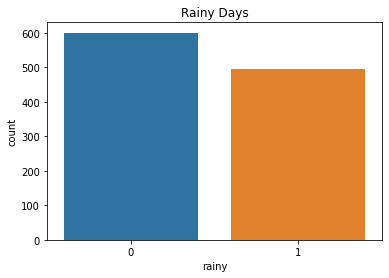

In [371]:
# count of our dependent categrocial variable of rainy days

sns.countplot(grouped_wdata['rainy']).set_title("Rainy Days")

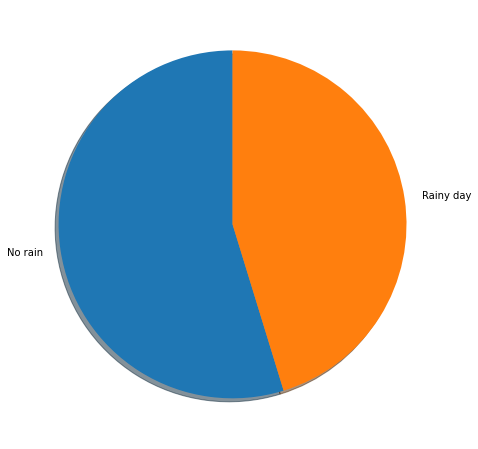

In [372]:
# making a pie chart 

rainday_lables = ['No rain' , 'Rainy day' ]
rainday_value_count = grouped_wdata['rainy'].value_counts()

# Creating the plot
fig = plt.figure(figsize=(10,8))
plt.pie(rainday_value_count, labels = rainday_lables,  shadow=True, startangle= 90)
plt.show()

rainy days(450-500) were sligthly less than number of not rainy days(600-650)

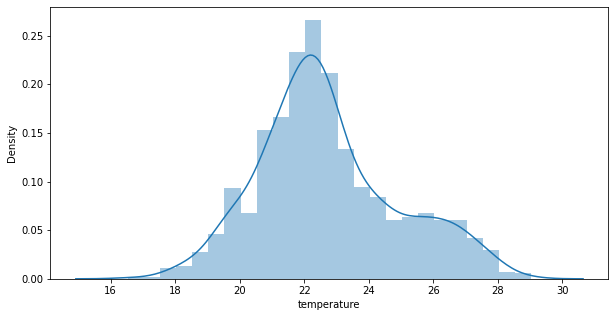

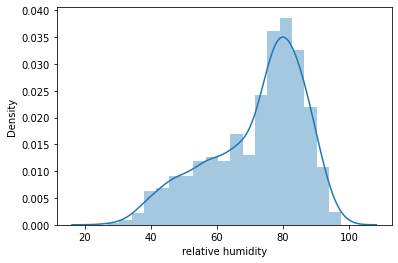

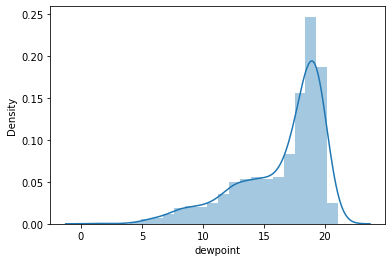

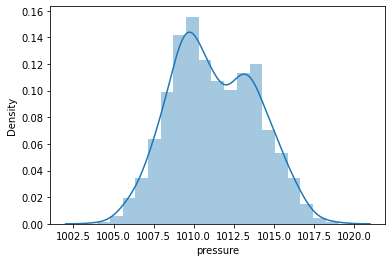

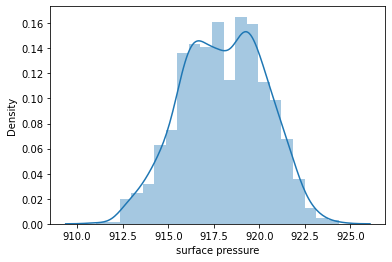

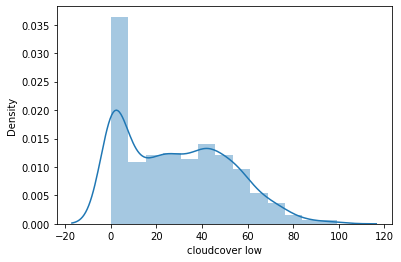

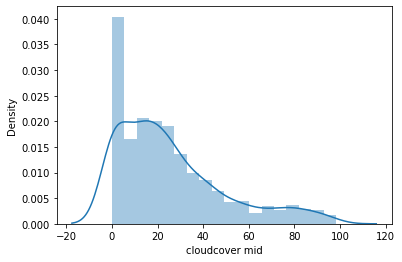

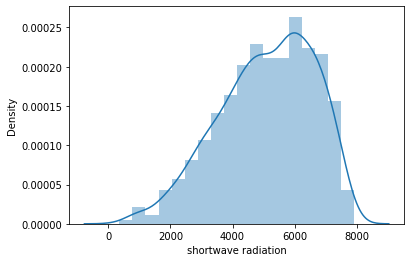

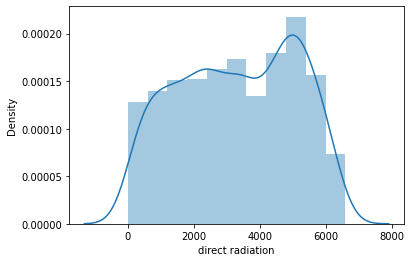

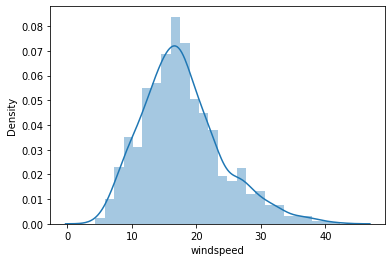

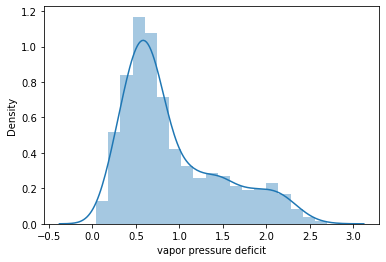

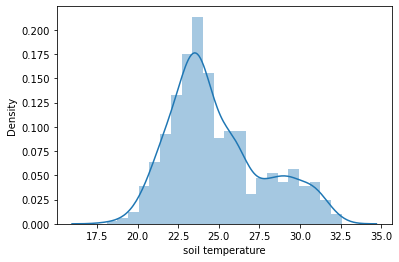

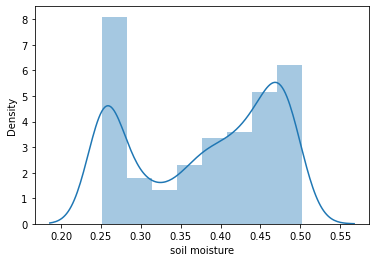

In [373]:

# checking data distribution of numerical columns
fig = plt.figure(figsize=(10,5))
n= 1
for i in feature_columns:
  n= n+1
  sns.distplot(grouped_wdata[i],kde=True)
  plt.show() 

**observation from distribution of nominal variables**

Temperature was like normal distributed.  

Relative humidity and dewpoint were like positively skewed, meanwhile cloudcover is negative skewed.

Variables like direct radiation , shortwave radiation, and surface pressure has very widely spread distribution.

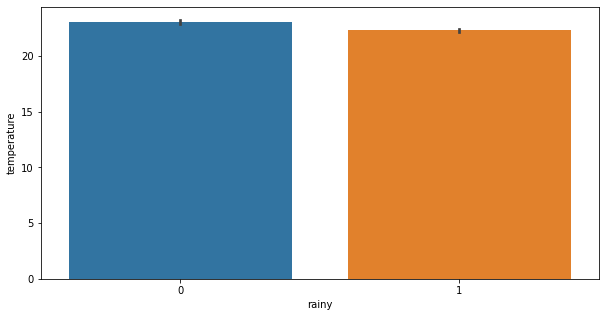

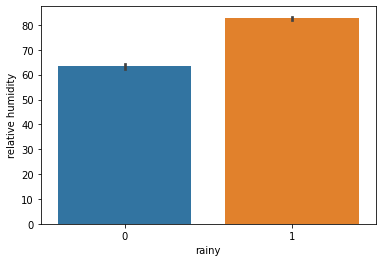

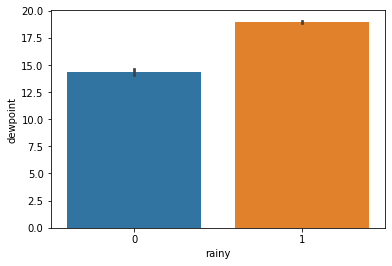

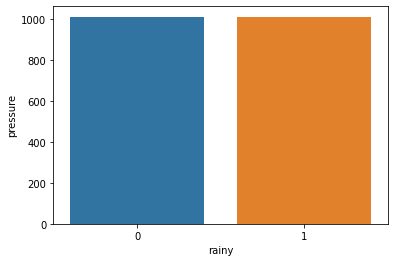

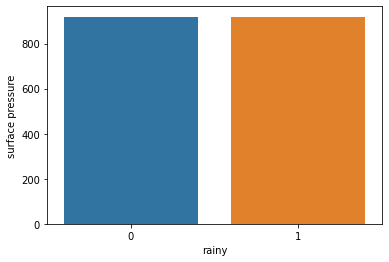

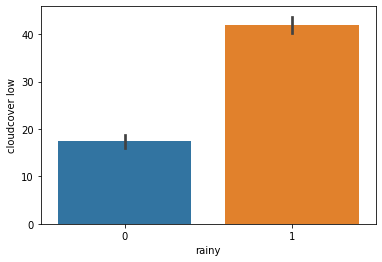

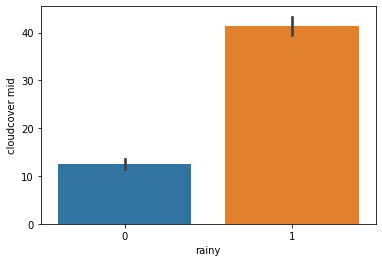

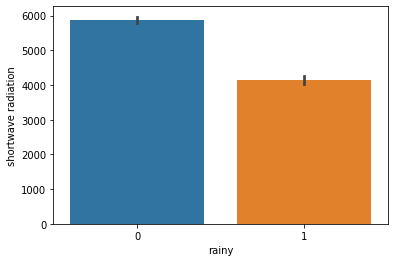

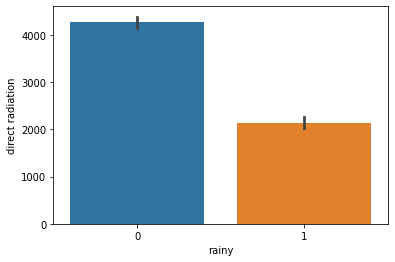

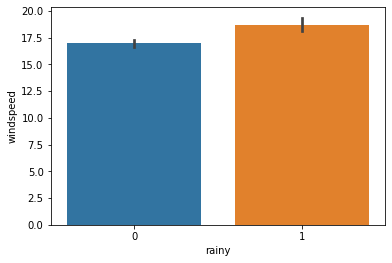

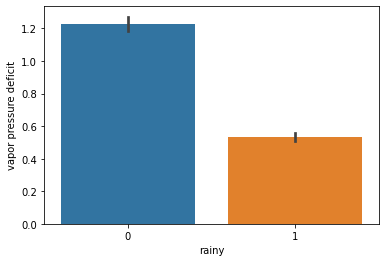

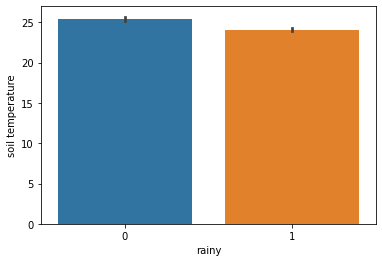

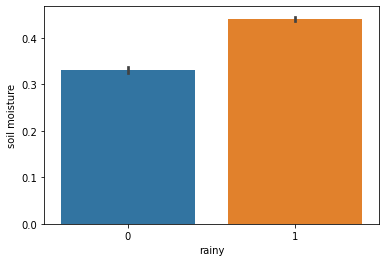

In [374]:
# barplot od independent feature column with dependent column

fig = plt.figure(figsize=(10,5))
n= 1
for i in feature_columns:
  n= n+1
  sns.barplot(data = grouped_wdata, y = i,x = 'rainy')
  plt.show() 

**Bar plot observation**

temperature on rainy days where slighty less than non- rain days.

dewpoint and relative humidty were both increasing chance with probability of rain happening.

seapressure and surface pressure were nearly equal on both the days.

cloudcover were particulary high on rainy days





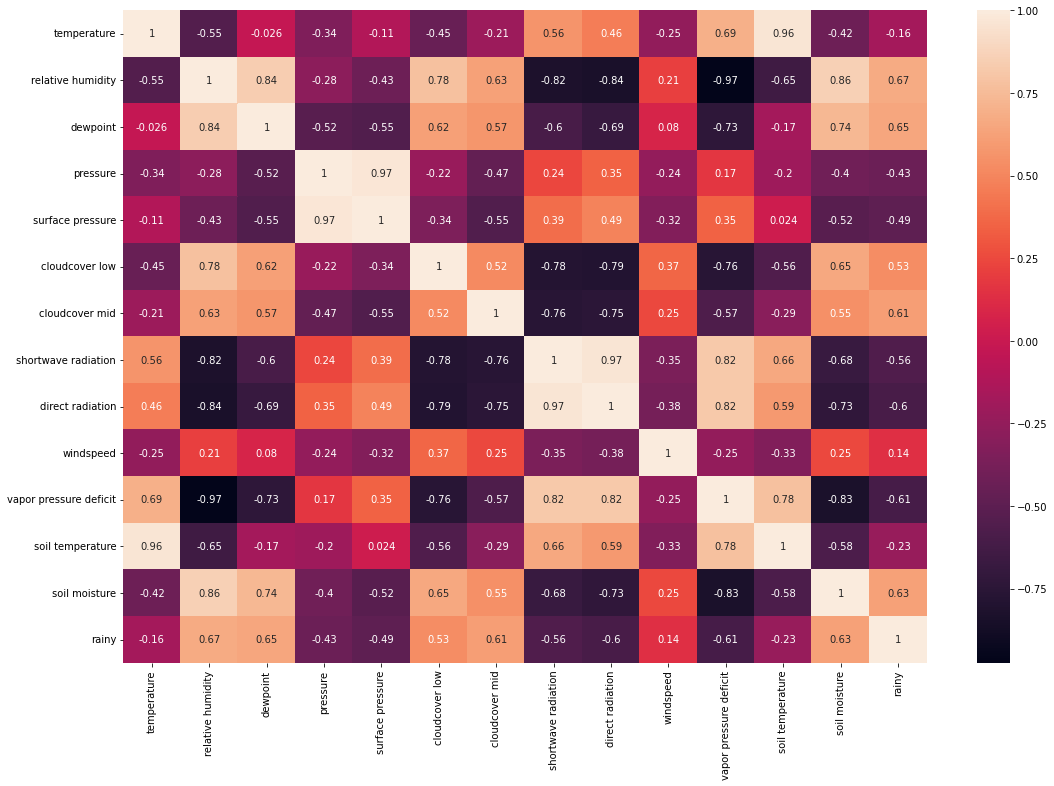

In [375]:
# ploting heat map to determine corelation b/w columns of your datasets

plt.figure(figsize = (18,12))
sns.heatmap(grouped_wdata.corr() , annot = True )

In [376]:
# checking multicolinearity with the help of Variance Inflation Factor(VIF)

In [377]:
# calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def check_vif(dataframe):
  # the independent variables set
  X = dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  print(vif_data)

In [378]:

check_vif(grouped_wdata)

                   feature           VIF
0              temperature  1.843225e+04
1        relative humidity  3.583573e+03
2                 dewpoint  2.182195e+03
3                 pressure  8.526582e+07
4         surface pressure  8.658337e+07
5           cloudcover low  1.033051e+01
6           cloudcover mid  8.416795e+00
7      shortwave radiation  4.976330e+02
8         direct radiation  1.537944e+02
9                windspeed  1.322470e+01
10  vapor pressure deficit  6.081811e+02
11        soil temperature  3.068974e+03
12           soil moisture  1.528951e+02
13                   rainy  5.130643e+00


Our Vif value of variable is not that high, so multicolinearity is not big issue here, and we can move ahead

## **Feature Scaling**

In [379]:
# normalization or standard scaling
X = X.apply(lambda x : (x-np.mean(x))/np.std(x))

In [380]:
X.head()

,temperature,relative humidity,dewpoint,pressure,surface pressure,cloudcover low,cloudcover mid,shortwave radiation,direct radiation,windspeed,vapor pressure deficit,soil temperature,soil moisture
Date,,,,,,,,,,,,,
2020-01-01,-0.678937,0.606233,0.309575,1.766789,1.662183,1.263140,-0.490609,-0.514398,-0.322971,0.204686,-0.643741,-0.594020,-0.717225
2020-01-02,-0.457867,0.530679,0.374918,2.076293,2.090130,1.075478,-0.444770,-0.664822,-0.467195,-0.213729,-0.569156,-0.481681,-0.649431
2020-01-03,0.020799,0.045387,0.145626,1.510702,1.590858,0.501666,-0.679255,0.087954,0.385759,-0.768511,-0.052906,-0.184991,-0.654646
2020-01-04,0.180354,-0.268455,-0.072973,0.814711,0.879441,-0.274244,-0.346040,-0.072323,0.163225,-0.960755,0.193519,-0.098577,-0.745670
2020-01-05,0.193810,-0.108628,0.096916,0.755010,0.831891,-0.202066,-0.448296,-0.143265,0.137310,-0.735916,0.069209,-0.072652,-0.821998


## **Train test spilt of dataset**

In [381]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(grouped_wdata.drop('rainy', axis=1),
                                                    grouped_wdata['rainy'],
                                                    test_size=0.2,
                                                    random_state=0)

In [382]:
X_train.shape, X_test.shape

((876, 13), (220, 13))

In [383]:
Y_train.shape , Y_test.shape

((876,), (220,))

## **Machine Learning Model Building**

### **Logistic Regression**

In [384]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100] }

logistic_model= GridSearchCV(LogisticRegression(), param_grid_lr, n_jobs = -1, verbose = 3, cv = 3)
logistic_model.fit(X_train, y_train)

Fitting 3 folds for each of 34 candidates, totalling 102 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [385]:
logistic_model.best_estimator_

LogisticRegression(C=0.01)

In [386]:
logistic_model.score(X_train, y_train)

0.8858447488584474

In [387]:
y_pred_logistic_train = logistic_model.predict(X_train)

In [388]:
y_pred_logistic_test = logistic_model.predict(X_test)

In [389]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [390]:
logistic_train_accuracy= accuracy_score(y_train, y_pred_logistic_train)
logistic_test_accuracy= accuracy_score(y_test, y_pred_logistic_test)

print("The accuracy on train data is ", logistic_train_accuracy)
print("The accuracy on test data is ", logistic_test_accuracy)

The accuracy on train data is  0.8858447488584474
The accuracy on test data is  0.8954545454545455


In [391]:
logistic_test_precision= precision_score(y_test, y_pred_logistic_test)
logistic_test_recall= recall_score(y_test, y_pred_logistic_test)
logistic_test_f1score= f1_score(y_test, y_pred_logistic_test)

In [392]:
model_results = pd.DataFrame([['Logistic Regression', logistic_test_accuracy, logistic_test_precision, logistic_test_recall, 
                         logistic_test_f1score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.895455,0.881818,0.906542,0.894009


### **Decision Tree**

In [393]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {'max_depth':[2,4,6,8,10],
              'min_samples_leaf':[2,4,6,8,10], 
              'min_samples_split':[2,4,6,8,10],
              }

dt_model = GridSearchCV(DecisionTreeClassifier(), param_grid= param_grid_dt, scoring = 'recall', cv=3, n_jobs=-1)
dt_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [394]:
dt_model.best_params_

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [395]:
dt_model.score(X_train, y_train)

0.9485861182519281

In [396]:
y_pred_dt_train = dt_model.predict(X_train)
y_pred_dt_test = dt_model.predict(X_test)

In [397]:
dt_train_accuracy= accuracy_score(y_train, y_pred_dt_train)
dt_test_accuracy= accuracy_score(y_test, y_pred_dt_test)

print("The accuracy on train data is ", dt_train_accuracy)
print("The accuracy on test data is ", dt_test_accuracy)

The accuracy on train data is  0.884703196347032
The accuracy on test data is  0.8772727272727273


In [398]:
dt_test_precision= precision_score(y_test, y_pred_dt_test)
dt_test_recall= recall_score(y_test, y_pred_dt_test)
dt_test_f1score= f1_score(y_test, y_pred_dt_test)

In [399]:
model = pd.DataFrame([['Decision Tree Classifier', dt_test_accuracy, dt_test_precision, dt_test_recall, 
                         dt_test_f1score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.895455,0.881818,0.906542,0.894009
1,Decision Tree Classifier,0.877273,0.833333,0.934579,0.881057


### **Random Forest**

In [400]:
# Random forest

# creating object for model: random forest classifier

from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10]
}


rf = RandomForestClassifier()
rf_model = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
rf_model.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [401]:
rf_model.best_params_

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

In [402]:
rf_model.score(X_train, y_train)

0.9726027397260274

In [403]:
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

In [404]:
rf_train_accuracy= accuracy_score(y_train, y_pred_rf_train)
rf_test_accuracy= accuracy_score(y_test, y_pred_rf_test)

print("The accuracy on train data is ", rf_train_accuracy)
print("The accuracy on test data is ",rf_test_accuracy)

The accuracy on train data is  0.9726027397260274
The accuracy on test data is  0.9


In [405]:
rf_test_precision= precision_score(y_test, y_pred_rf_test)
rf_test_recall= recall_score(y_test, y_pred_rf_test)
rf_test_f1score= f1_score(y_test, y_pred_rf_test)

In [406]:
model = pd.DataFrame([['Random Forest Classifier', rf_test_accuracy, rf_test_precision, rf_test_recall, 
                         rf_test_f1score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.895455,0.881818,0.906542,0.894009
1,Decision Tree Classifier,0.877273,0.833333,0.934579,0.881057
2,Random Forest Classifier,0.900000,0.904762,0.887850,0.896226


### **Default XGBoost Classifier**

In [407]:
## Default XGBoost Classifier

from xgboost import XGBClassifier
xgb = XGBClassifier(class_weight='balanced')
xgb.fit(X_train, y_train)

XGBClassifier(class_weight='balanced')

In [408]:
xgb.score(X_train, y_train)

0.9691780821917808

In [409]:
y_pred_default_xgb_train = xgb.predict(X_train)
y_pred_default_xgb_test = xgb.predict(X_test)

In [410]:
default_xgb_train_accuracy= accuracy_score(y_train, y_pred_default_xgb_train)
default_xgb_test_accuracy= accuracy_score(y_test, y_pred_default_xgb_test)

print("The accuracy on train data is ", default_xgb_train_accuracy)
print("The accuracy on test data is ", default_xgb_test_accuracy)

The accuracy on train data is  0.9691780821917808
The accuracy on test data is  0.9045454545454545


In [411]:
default_xgb_test_precision= precision_score(y_test, y_pred_default_xgb_test)
default_xgb_test_recall= recall_score(y_test, y_pred_default_xgb_test)
default_xgb_test_f1score= f1_score(y_test, y_pred_default_xgb_test)


In [412]:
model = pd.DataFrame([['Default XGBoost Classifier', default_xgb_test_accuracy, default_xgb_test_precision, default_xgb_test_recall, 
                         default_xgb_test_f1score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.895455,0.881818,0.906542,0.894009
1,Decision Tree Classifier,0.877273,0.833333,0.934579,0.881057
2,Random Forest Classifier,0.900000,0.904762,0.887850,0.896226
3,Default XGBoost Classifier,0.904545,0.930000,0.869159,0.898551


### **XGBoost Classifier with GridSearchCV**

In [413]:
from xgboost import  XGBClassifier

param_xgb ={'n_estimators': [50,80,100],
            'max_depth': [3,5,7],
            'learning_rate': [0.1,0.2], 
            'min_child_weight': [2,3]
            }

xgb_model = GridSearchCV(XGBClassifier(class_weight='balanced'), param_grid=param_xgb, scoring='recall', cv=3, n_jobs=-1)
xgb_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(class_weight='balanced'), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 7],
                         'min_child_weight': [2, 3],
                         'n_estimators': [50, 80, 100]},
             scoring='recall')

In [414]:
xgb_model.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 80}

In [415]:
xgb_model.score(X_train, y_train)

0.9820051413881749

In [416]:
y_pred_xgb_train = xgb_model.predict(X_train)
y_pred_xgb_test = xgb_model.predict(X_test)

In [417]:
xgb_train_accuracy= accuracy_score(y_train, y_pred_xgb_train)
xgb_test_accuracy= accuracy_score(y_test, y_pred_xgb_test)

print("The accuracy on train data is ", xgb_train_accuracy)
print("The accuracy on test data is ", xgb_test_accuracy)

The accuracy on train data is  0.9828767123287672
The accuracy on test data is  0.9


In [418]:
xgb_test_precision= precision_score(y_test, y_pred_xgb_test)
xgb_test_recall= recall_score(y_test, y_pred_xgb_test)
xgb_test_f1score= f1_score(y_test, y_pred_xgb_test)


In [419]:
model = pd.DataFrame([['GridSearch XGBoost Classifier', xgb_test_accuracy, xgb_test_precision, xgb_test_recall, xgb_test_f1score]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.895455,0.881818,0.906542,0.894009
1,Decision Tree Classifier,0.877273,0.833333,0.934579,0.881057
2,Random Forest Classifier,0.900000,0.904762,0.887850,0.896226
3,Default XGBoost Classifier,0.904545,0.930000,0.869159,0.898551
4,GridSearch XGBoost Classifier,0.900000,0.920792,0.869159,0.894231


## **Conclusion**

Since all of the variable were giving me nearly equal F1 score, but different precision and recall values. so we have to choose ML models we have to use on different situatuion and use cases.

for example in the instanes , where we have to check accracy of our positive prediction then we have to give more importance to high precision and at that time logistic regression and XGboost are good choice

meanwhile in a situation where we have to check whether we are able to identify day of rainfall or not meanwhile how much true positive we are able to identify, in those instances we have to give more wqiegtahe to recall and decison tree will be most appropriate choice there

in simple words 
Need to give importance to precison and check accuracy of our positive orediction then XGBOOST and Logistic regression ,
and more importance to recall and check how much actual positive we are able to identify , then Decision Tree .
